This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 18s 9ms/step - loss: 0.1560 - accuracy: 0.9515
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0429 - accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0225 - accuracy: 0.9936
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0173 - accuracy: 0.9945


**Evaluating the convnet**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0261 - accuracy: 0.9926
Test accuracy: 0.993


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taliadagan","key":"144955bcb9267af3c88b94ee0f23c787"}'}

In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:17<00:00, 72.3MB/s]
100% 812M/812M [00:18<00:00, 45.8MB/s]


In [10]:
!unzip -qq dogs-vs-cats.zip

In [11]:
!unzip -qq test1.zip

In [12]:
!unzip -qq train.zip

# **Question 1** 
Use any technique to reduce 
overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?  





In [13]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

### Building the model

In [14]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [15]:
#1000 samples 

In [16]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)


In [17]:

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [18]:
#32 size 
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [19]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [20]:
#displaying shapes 
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Instantiating a small convnet for dogs vs. cats classification**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Fitting the model using a `Dataset`**

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11s 124ms/step - loss: 0.7262 - accuracy: 0.5060 - val_loss: 0.6901 - val_accuracy: 0.5040
Epoch 2/30
63/63 [==============================] - 7s 112ms/step - loss: 0.6981 - accuracy: 0.5430 - val_loss: 0.7308 - val_accuracy: 0.5010
Epoch 3/30
63/63 [==============================] - 7s 112ms/step - loss: 0.6823 - accuracy: 0.5795 - val_loss: 0.6416 - val_accuracy: 0.6490
Epoch 4/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6668 - accuracy: 0.6225 - val_loss: 0.7076 - val_accuracy: 0.5300
Epoch 5/30
63/63 [==============================] - 8s 115ms/step - loss: 0.6814 - accuracy: 0.6680 - val_loss: 0.6313 - val_accuracy: 0.6530
Epoch 6/30
63/63 [==============================] - 7s 112ms/step - loss: 0.5810 - accuracy: 0.7020 - val_loss: 0.5898 - val_accuracy: 0.6850
Epoch 7/30
63/63 [==============================] - 7s 113ms/step - loss: 0.5602 - accuracy: 0.7060 - val_loss: 0.5718 - val_accuracy: 0.6860
Epoch

**Displaying curves of loss and accuracy during training**

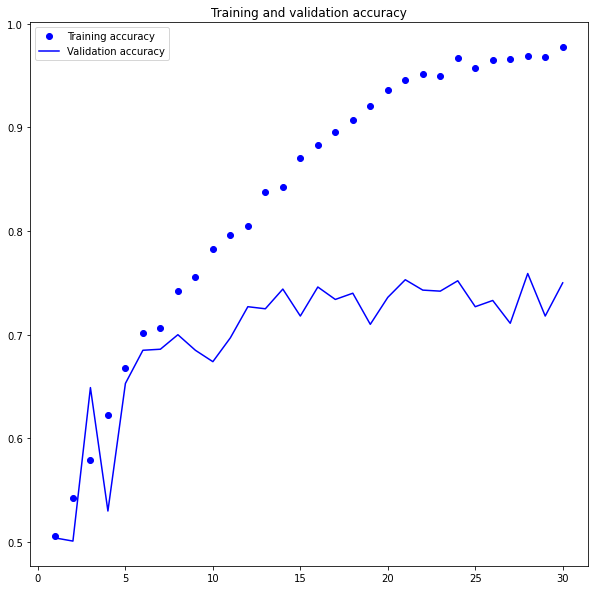

<Figure size 432x288 with 0 Axes>

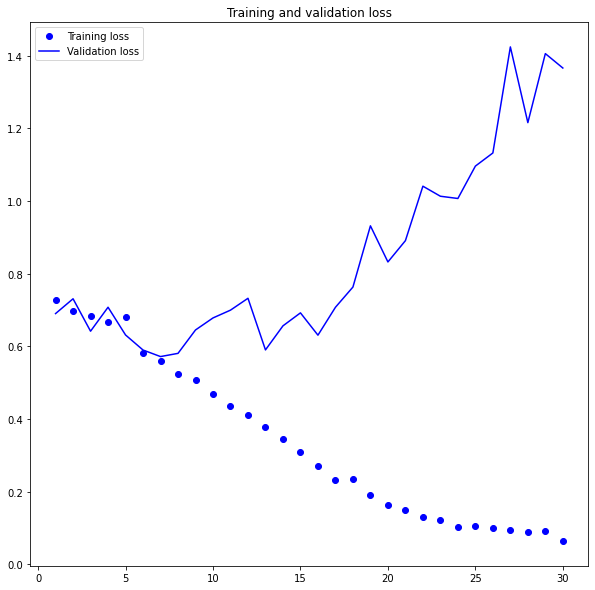

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [26]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 47ms/step - loss: 0.6050 - accuracy: 0.6890
Test accuracy: 0.689


## The performance that I achieved with a training sample of 1,000 and a validation sample of 500 and a test sample of 500 was 68.9% accuracy for test accuracy.

## QUESTION #2
Increasing the training sample size with the same validation anf test samples.


**Define a data augmentation stage to add to an image model**

In [27]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#increasing the sample size to 1600
make_subset("train", start_index=0, end_index=1600)
make_subset("validation", start_index=1600, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)


In [28]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

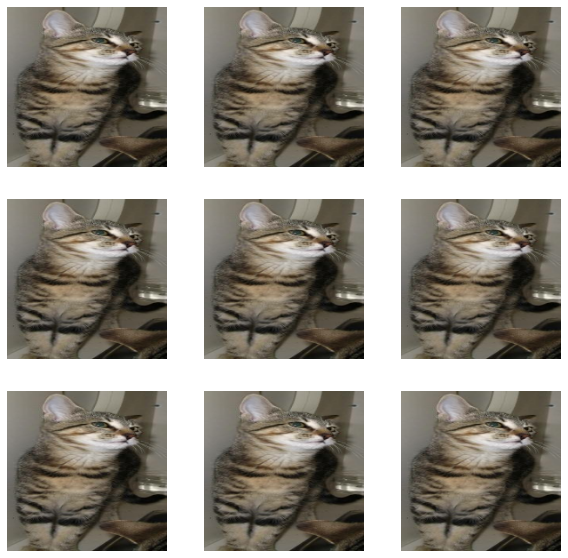

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [30]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 10s 122ms/step - loss: 0.6995 - accuracy: 0.5150 - val_loss: 1.0215 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 8s 120ms/step - loss: 0.7031 - accuracy: 0.5470 - val_loss: 0.6979 - val_accuracy: 0.5060
Epoch 3/50
63/63 [==============================] - 8s 120ms/step - loss: 0.6805 - accuracy: 0.5570 - val_loss: 0.6584 - val_accuracy: 0.5760
Epoch 4/50
63/63 [==============================] - 8s 118ms/step - loss: 0.6660 - accuracy: 0.6080 - val_loss: 0.7408 - val_accuracy: 0.5240
Epoch 5/50
63/63 [==============================] - 8s 120ms/step - loss: 0.6315 - accuracy: 0.6455 - val_loss: 0.6437 - val_accuracy: 0.6110
Epoch 6/50
63/63 [==============================] - 8s 120ms/step - loss: 0.6305 - accuracy: 0.6495 - val_loss: 0.6086 - val_accuracy: 0.6790
Epoch 7/50
63/63 [==============================] - 8s 120ms/step - loss: 0.6014 - accuracy: 0.6750 - val_loss: 0.5769 - val_accuracy: 0.6860
Epoch

**Evaluating the model on the test set**

In [32]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 44ms/step - loss: 0.4782 - accuracy: 0.8030
Test accuracy: 0.803


# Increasing the sample size to 1,600 from 1,000 led to a test accuracy of 80.3%. Increasing the sample size led to a more accurate model. 



# QUESTION 3###
Increasing the sample size to 2,500 achieve a better performance.

In [33]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Increaseing the training sample to 2,5000 and keeping validation and test same as before. 
make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=2500, end_index=3000)
make_subset("test", start_index=3000, end_index=3500)

In [34]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 9s 119ms/step - loss: 0.6952 - accuracy: 0.4810 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 8s 118ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6866 - val_accuracy: 0.5210
Epoch 3/50
63/63 [==============================] - 8s 120ms/step - loss: 0.6848 - accuracy: 0.5475 - val_loss: 0.6783 - val_accuracy: 0.5730
Epoch 4/50
63/63 [==============================] - 7s 114ms/step - loss: 0.6806 - accuracy: 0.5885 - val_loss: 0.6847 - val_accuracy: 0.5650
Epoch 5/50
63/63 [==============================] - 8s 115ms/step - loss: 0.6588 - accuracy: 0.6120 - val_loss: 0.6655 - val_accuracy: 0.6050
Epoch 6/50
63/63 [==============================] - 8s 115ms/step - loss: 0.6465 - accuracy: 0.6285 - val_loss: 0.7161 - val_accuracy: 0.5320
Epoch 7/50
63/63 [==============================] - 8s 115ms/step - loss: 0.6453 - accuracy: 0.6575 - val_loss: 0.6201 - val_accuracy: 0.6580
Epoch 

In [36]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 44ms/step - loss: 0.4156 - accuracy: 0.8220
Test accuracy: 0.822


### Increasing the sample size to 2,500 led to a more accurate test accuracy of 82.2%




# QUESTION 4
# Repeating steps 1-3 using a pretrained network to achieve the best performance. 

**Instantiating the VGG16 convolutional base**

In [37]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [39]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [40]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [41]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 1s 13ms/step - loss: 16.6639 - accuracy: 0.9240 - val_loss: 3.7075 - val_accuracy: 0.9690
Epoch 2/30
63/63 [==============================] - 1s 8ms/step - loss: 4.2252 - accuracy: 0.9760 - val_loss: 5.0618 - val_accuracy: 0.9680
Epoch 3/30
63/63 [==============================] - 0s 8ms/step - loss: 2.9557 - accuracy: 0.9815 - val_loss: 17.0950 - val_accuracy: 0.9300
Epoch 4/30
63/63 [==============================] - 1s 9ms/step - loss: 1.4389 - accuracy: 0.9885 - val_loss: 7.8837 - val_accuracy: 0.9660
Epoch 5/30
63/63 [==============================] - 0s 8ms/step - loss: 0.7574 - accuracy: 0.9945 - val_loss: 7.3943 - val_accuracy: 0.9690
Epoch 6/30
63/63 [==============================] - 1s 9ms/step - loss: 0.8749 - accuracy: 0.9905 - val_loss: 4.9364 - val_accuracy: 0.9760
Epoch 7/30
63/63 [==============================] - 1s 9ms/step - loss: 0.9373 - accuracy: 0.9945 - val_loss: 5.9275 - val_accuracy: 0.9700
Epoch 8/30
63/63 

**Plotting the results**

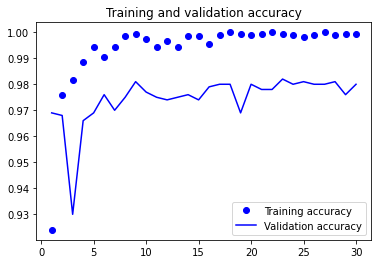

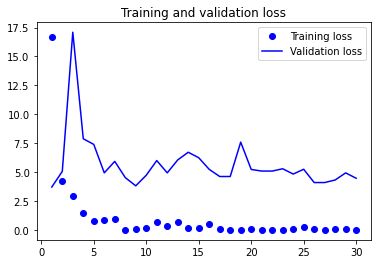

In [42]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [43]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [44]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [45]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [46]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [47]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 23s 337ms/step - loss: 17.4740 - accuracy: 0.8950 - val_loss: 4.6089 - val_accuracy: 0.9720
Epoch 2/50
63/63 [==============================] - 21s 334ms/step - loss: 7.1936 - accuracy: 0.9430 - val_loss: 3.1780 - val_accuracy: 0.9720
Epoch 3/50
63/63 [==============================] - 21s 331ms/step - loss: 5.2554 - accuracy: 0.9620 - val_loss: 7.8970 - val_accuracy: 0.9640
Epoch 4/50
63/63 [==============================] - 21s 331ms/step - loss: 4.9372 - accuracy: 0.9610 - val_loss: 3.9097 - val_accuracy: 0.9770
Epoch 5/50
63/63 [==============================] - 21s 330ms/step - loss: 4.9667 - accuracy: 0.9650 - val_loss: 7.5746 - val_accuracy: 0.9600
Epoch 6/50
63/63 [==============================] - 21s 330ms/step - loss: 3.5362 - accuracy: 0.9665 - val_loss: 5.4690 - val_accuracy: 0.9700
Epoch 7/50
63/63 [==============================] - 21s 330ms/step - loss: 4.1928 - accuracy: 0.9655 - val_loss: 3.4945 - val_accuracy: 0.973

**Evaluating the model on the test set**

In [48]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 7s 209ms/step - loss: 2.4916 - accuracy: 0.9760
Test accuracy: 0.976


### Fine-tuning a pretrained model

In [49]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [50]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [51]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 25s 368ms/step - loss: 0.4634 - accuracy: 0.9870 - val_loss: 1.9653 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 23s 359ms/step - loss: 0.4916 - accuracy: 0.9920 - val_loss: 2.0313 - val_accuracy: 0.9770
Epoch 3/30
63/63 [==============================] - 23s 363ms/step - loss: 0.3868 - accuracy: 0.9910 - val_loss: 1.8703 - val_accuracy: 0.9760
Epoch 4/30
63/63 [==============================] - 23s 358ms/step - loss: 0.3849 - accuracy: 0.9880 - val_loss: 2.0150 - val_accuracy: 0.9710
Epoch 5/30
63/63 [==============================] - 23s 358ms/step - loss: 0.5047 - accuracy: 0.9905 - val_loss: 2.2080 - val_accuracy: 0.9730
Epoch 6/30
63/63 [==============================] - 23s 362ms/step - loss: 0.3236 - accuracy: 0.9910 - val_loss: 1.5540 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 23s 358ms/step - loss: 0.1639 - accuracy: 0.9955 - val_loss: 1.6766 - val_accuracy: 0.9790

In [52]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 7s 208ms/step - loss: 1.6356 - accuracy: 0.9740
Test accuracy: 0.974


### Summary

When using a pre-trained model that does not use augmentation the model produces a 97.6% test accuracy.
When using a pre-trained model with fine tuning led to a test accuracy of 97.4%. 

The overall accuracy of a model is related to the sample size. In steps 1-3, it was clearly shown that as the sample size increased, the accuracy increased as well. In step 1 used a sample size of 1,000 and achieved an accuracy of 68.9%. In step 2, I increased the sample size to 1,6000 which led to an accuracy of 80.3%. In step 3, the sample size was increased to 2,500 and a test accuracy of 82.2%. The sample size is related to the accuracy.